<a href="https://colab.research.google.com/github/Vurimindi2021/Capstone2/blob/main/image_test_train5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Importing Python Libraries

In [ ]:
import os, timeit, datetime, math, random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dropout, Dense, LeakyReLU, ReLU
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import FalseNegatives, FalsePositives, TruePositives, TrueNegatives
from tensorflow.keras.metrics import Recall, Precision, SensitivityAtSpecificity, AUC, SparseCategoricalAccuracy
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix
import warnings
#warnings.filterwarnings("ignore")

#Google Drive Path to Images, Checkpoint & Tensorboard Logs

In [ ]:
train_path = '/content/drive/MyDrive/class_output/train/'
valid_path = '/content/drive/MyDrive/class_output/val/'
test_path  = '/content/drive/MyDrive/class_output/test/'
chkpt_path = '/content/drive/MyDrive/check_point5'
log_path = os.path.join("/content/drive/MyDrive/logs/fit/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

#Instantiating Parameters Values

In [ ]:
classes     = ['Atelectasis','Cardiomegaly','Consolidation', 'Edema','Effusion','Emphysema','Fibrosis','Hernia', 'Infiltration', 'Mass', 'NoFinding', 'Nodule', 'Pleural_Thickening', 'Pneumonia','Pneumothorax'] # Types of Image Classifications 
batch_size  = 64*3                         # Batch Size to Process Images in ImageDataGenerator
epochs      = 25                           # Number of Epochs in ResNetV2_model.fit
train_size  = 89689                        # Number of Images in Training Dataset
val_size    = 11206                        # Number of Images in Validation Dataset
activation  = tf.keras.layers.LeakyReLU(alpha=0.01)
optimizer   = Adam(1e-3)

#Claculating Number of Steps in CNN Model.fit per Epoch for Traning and Validation

In [ ]:
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(train_size)
val_steps = compute_steps_per_epoch(val_size)

#ImageDataGenerator & Image Augumentation for Training, Validation and Testing

In [ ]:
start_time = timeit.default_timer()
train_images = ImageDataGenerator().flow_from_directory(train_path, 
                                                        classes=classes,
                                                        target_size=(200,200),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')                               
valid_images = ImageDataGenerator().flow_from_directory(valid_path, 
                                                        classes=classes,
                                                        target_size=(200,200),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')  
test_images = ImageDataGenerator().flow_from_directory(test_path, 
                                                        classes=classes,
                                                        target_size=(200,200),
                                                        batch_size=11223,
                                                        class_mode='categorical')
elapsed = timeit.default_timer() - start_time
print(elapsed)

Found 89689 images belonging to 15 classes.
Found 11206 images belonging to 15 classes.
Found 11223 images belonging to 15 classes.
87.37045244000001


#verifying Image Classes and Numeric Values Assigned for Each Class

In [ ]:
print(train_images.class_indices)
print(valid_images.class_indices)
print(test_images.class_indices)

{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'NoFinding': 10, 'Nodule': 11, 'Pleural_Thickening': 12, 'Pneumonia': 13, 'Pneumothorax': 14}
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'NoFinding': 10, 'Nodule': 11, 'Pleural_Thickening': 12, 'Pneumonia': 13, 'Pneumothorax': 14}
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'NoFinding': 10, 'Nodule': 11, 'Pleural_Thickening': 12, 'Pneumonia': 13, 'Pneumothorax': 14}


#Creating Image and Label Array from ImageDataGenerator for all Batches in Train Data

In [ ]:
'''
def image_label(generator,imgarr,lblarr):
  imglst, lblst = [] , []
  for i in range(generator.n//generator.batch_size):
    X, y = generator.next()
    imglst.extend(X) 
    lblst.extend(y)
  imgarr = np.array(imglst)
  lblarr = np.array(lblst)
  return imgarr, lblarr
#Call def image_label()
start_time = timeit.default_timer()
image_label(train_images, 'X_trimg', 'y_trlbls')
elapsed = timeit.default_timer() - start_time
print(elapsed)
'''

"\ndef image_label(generator,imgarr,lblarr):\n  imglst, lblst = [] , []\n  for i in range(generator.n//generator.batch_size):\n    X, y = generator.next()\n    imglst.extend(X) \n    lblst.extend(y)\n  imgarr = np.array(imglst)\n  lblarr = np.array(lblst)\n  return imgarr, lblarr\n#Call def image_label()\nstart_time = timeit.default_timer()\nimage_label(train_images, 'X_trimg', 'y_trlbls')\nelapsed = timeit.default_timer() - start_time\nprint(elapsed)\n"

#Printing random (25) preprocessed images in 5X5 Matrix in Training Data First Batch

In [ ]:
start_time = timeit.default_timer()
X, y = train_images.next()
elapsed = timeit.default_timer() - start_time
print(elapsed)

56.72203213


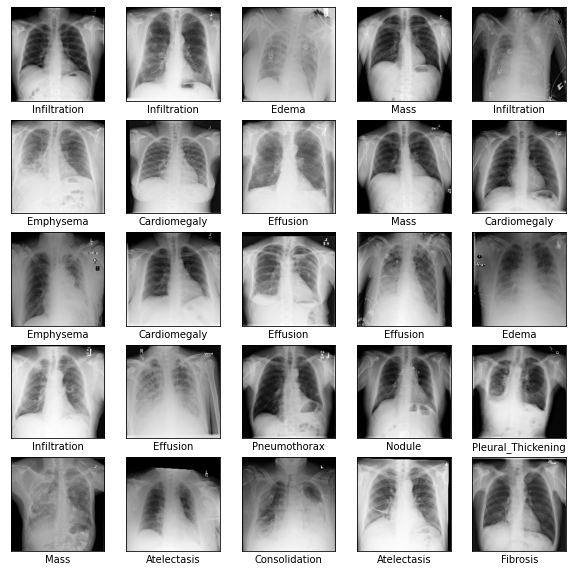

1.0450302790000023


In [ ]:
#change the input array names depending upon need to print random images from first batch
# or completele training data
start_time = timeit.default_timer()
randimglst = random.sample([i for i in range(1,batch_size+1)], 25)
#randimglst = random.sample([i for i in range(1,train_images.n+1)], 9)
plt.figure(figsize=(10,10))
for i, image in enumerate(randimglst):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X[image][:,:,0],cmap='gray')
  plt.xlabel(classes[np.int(np.where(y[image] == 1.)[0])])
  #plt.imshow(X_trimg[image][:,:,0])
  #plt.xlabel(classes[np.int((y_trlbls[image]))])
plt.show()
elapsed = timeit.default_timer() - start_time
print(elapsed)

#Load resnet_v2.ResNet152V2 Model, add Conv2D, AveragePooling2D, Flatten, Dropout, and Dense Layers and compile CNN Model

In [ ]:
i = tf.keras.layers.Input([200,200, 3], dtype = tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.compat.v1.keras.applications.resnet_v2.preprocess_input(x)
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(200,200,3))
base_model.trainable = False
x = base_model(x)

234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
# add layers

x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(15, activation='softmax')(x)
new_model = Model(inputs=[i], outputs=[x])
new_model.summary()
#tf.keras.utils.plot_model(model, to_file='/content/drive/MyDrive/figs/ResNetV2_model.png')

new_model.compile(optimizer=Adam(1e-3), 
                       loss='categorical_crossentropy', 
                       metrics=[tf.keras.metrics.Accuracy(),
                                tf.keras.metrics.CategoricalAccuracy(), 
                                tf.keras.metrics.CategoricalCrossentropy(), 
                                tf.keras.metrics.SparseCategoricalAccuracy(),
                                tf.keras.metrics.SparseCategoricalCrossentropy(),
                                tf.keras.metrics.AUC(),
                                tf.keras.metrics.Recall(), 
                                tf.keras.metrics.Precision(),
                                tf.keras.metrics.SensitivityAtSpecificity(0.5),
                                tf.keras.metrics.TruePositives(),
                                tf.keras.metrics.TrueNegatives(),
                                tf.keras.metrics.FalseNegatives(),
                                tf.keras.metrics.FalsePositives()
                                ])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
tf.cast (TFOpLambda)         (None, 200, 200, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 200, 200, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 200, 200, 3)       0         
_________________________________________________________________
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
Total params: 58,331,648
Trainable params: 0
Non-trainable params: 58,331,648
_________________________________________________________________


#Load Model weights from prior training runs when When training stopped or interuppted. The model weights are saved via Checkpoint in prior training run.

In [ ]:
#ResNet152V2_model.load_weights(chkpt_path)


#Adding callbacks.ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
checkpoint = callbacks.ModelCheckpoint(filepath=chkpt_path,
                                    save_weights_only=True,
                                    monitor='val_categorical_accuracy',
                                    mode='max',
                                    save_best_only=True)
earlystop = callbacks.EarlyStopping(monitor='val_categorical_accuracy', 
                                    min_delta=0.001, 
                                    patience=5, 
                                    verbose=1,
                                    mode='auto', 
                                    baseline=None, 
                                    restore_best_weights=True)
tensorboard = callbacks.TensorBoard(log_dir=log_path, 
                                    histogram_freq=1,
                                    write_graph=True)

#Train Model

In [ ]:
start_time = timeit.default_timer()
# train the model
history=new_model.fit(train_images,
                      shuffle=True,
                      verbose=1,
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_steps=val_steps,
                      validation_data=valid_images,
                      callbacks=[checkpoint, earlystop, tensorboard])
elapsed = timeit.default_timer() - start_time
print(elapsed)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/25


ValueError: ignored

#Plot Model Accuracy & Loss

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Predict Test Image Binary Classifications with 0.5 as threshhold

In [ ]:
y_pred = np.rint(ResNetV2_model.predict(test_images,verbose=1))
y_test =  next(test_images)[1]

#Confusion Matrix Code

In [ ]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix for InceptionResNetV2',fontsize= 20); 
    ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes]);
    plt.savefig(filename)

#Create Confusion Matrix

In [ ]:
labels =[0,1]
cm = confusion_matrix(y_test, y_pred, labels)
filename='/content/drive/MyDrive/figs/CM_InceptionResNetV2.png'
cm_analysis(y_test, y_pred, filename, labels, ymap=None, figsize=(10,10))

In [ ]:
%load_ext tensorboard
#%reload_ext tensorboard
import tensorflow as tf
import datetime
%tensorboard --logdir /content/drive/MyDrive/logs/fit/